# ORBIT HOMEWORK

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
degree = UNITS.degree
radian = UNITS.radian
N = UNITS.newton

<Unit('newton')>

In [3]:
r_0 = 147e9 * m

init = State(x = -r_0, y = 0 * m, vx = 0 *m/s, vy = 29784 *m/s)

,values
x,-147000000000.0 meter
y,0 meter
vx,0.0 meter / second
vy,29784.0 meter / second


In [4]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=31536000 * s)

,values
init,x -147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
m2,5.972e+24 kilogram
t_0,0 second
t_end,31536000 second


In [5]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x,y,vx,vy = state
    unpack(system)
    
    cur_position = Vector(x,y)
    mag = cur_position.mag
    
    force = G * m1 * m2 / mag**2
    direction = -cur_position.hat()
    
    u_force = direction * force
    
    return u_force

In [6]:
force = universal_gravitation(init,system)

<Quantity([ 3.6686486e+22 -0.0000000e+00], 'newton')>

In [7]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x,y,vx,vy = state
    unpack(system)    

    force = universal_gravitation(state, system)
    dxdt = vx
    dydt = vy
    dvxdt = force.x / m2
    dvydt = force.y / m2
    
    return dxdt, dydt, dvxdt, dvydt

In [8]:
slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(29784.0, 'meter / second')>,
 <Quantity(0.006143082049146188, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [13]:
def event_func(state, t, system):
    x,y,vx,vy = state
    if t> 0.75 * system.t_end and y == 0:
        return 0
    else:
        return 1

In [14]:
results, details = run_ode_solver(system, slope_func, events=event_func, max_step = 10000)
details

,values
sol,None
t_events,[[]]
nfev,18998
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [15]:
results;

Saving figure to file figs/chap10-fig02.pdf


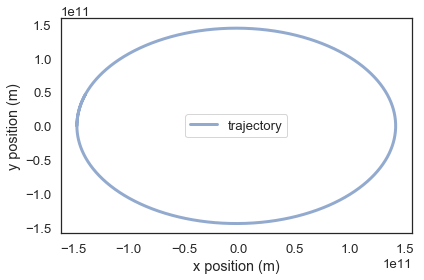

In [16]:
def plot_trajectory(results):
    plot(results.x, results.y, label='trajectory')

    decorate(xlabel='x position (m)',
             ylabel='y position (m)')

plot_trajectory(results)
savefig('figs/chap10-fig02.pdf')